In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ["Age", "Sex", "On Thyroxine", "Query on Thyroxine", 
           "On Antithyroid Medication", "Sick", "Pregnant", 
           "Thyroid Surgery", "I131 Treatment", "Query Hypothyroid", 
           "Query Hyperthyroid", "Lithium", "Goitre", "Tumor", 
           "Hypopituitary", "Psych", "TSH Measured", "TSH", "T3 Measured", 
           "T3", "TT4 Measured", "TT4", "T4U Measured", "T4U", 
           "FTI Measured", "FTI", "TBG Measured", "TBG", "Referral Source", "Category"]

In [3]:
hyper_data = pd.read_csv(r"C:\Users\hnrne\Downloads\allhyperdata.csv", names=columns)
hypo_data = pd.read_csv(r"C:\Users\hnrne\Downloads\allhypodata.csv", names=columns)
sick_data = pd.read_csv(r"C:\Users\hnrne\Downloads\sickdata.csv", names=columns)

In [4]:
hyper_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [5]:
hypo_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [6]:
sick_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [7]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row

def convert_category(dataframe, column):
    
    if column == 'Sex':
        conditionF = dataframe[column] == 'F' # For sex column
        conditionT = dataframe[column] == 'M' # For sex column
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

In [8]:
hyper_data['Category'] = hyper_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['Category'] = hypo_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['Category'] = sick_data['Category'] \
                            .apply(parse_row)

In [9]:
thyroid_frames = [hyper_data, hypo_data, sick_data]
thyroid_data1 = pd.concat(thyroid_frames) \
                 .drop_duplicates() \
                 .drop(['Referral Source', 'TBG', 'TBG Measured'], axis=1)

In [10]:
thyroid_data=thyroid_data1

In [11]:
classes = thyroid_data['Category'].unique()
print(classes)

['negative' 'hyperthyroid' 'hypothyroid' 'sick']


In [12]:
thyroid_data

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,82,M,f,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
2776,79,M,f,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
2782,50,F,f,f,f,f,f,f,f,t,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
2786,73,?,f,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [13]:
# Binarize Category Columns
binary_cols = ['On Thyroxine', 'Query on Thyroxine', 'Sex',
               'On Antithyroid Medication', 'Sick', 'Pregnant', 
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
               'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
               'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 
               'TT4 Measured', 'T4U Measured', 'FTI Measured']

for col in binary_cols: convert_category(thyroid_data, col)

In [14]:
# Convert '?' to np.nan and convert numeric data to numeric dtype
for col in thyroid_data.columns: 
    if col != 'Category':
        thyroid_data.loc[thyroid_data[col] == '?', col] = np.nan
        thyroid_data[col] = pd.to_numeric(thyroid_data[col])

In [15]:
curr_columns = thyroid_data.columns.difference(['Category'])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imputer.fit_transform(thyroid_data.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)

thyroid_data = pd.concat([
                    imputed_data.reset_index(), 
                    thyroid_data['Category'].reset_index()], 
                    axis=1).drop('index', axis=1)

In [16]:
thyroid_data.shape

(3221, 27)

In [17]:
thyroid_data.dtypes

Age                          float64
FTI                          float64
FTI Measured                 float64
Goitre                       float64
Hypopituitary                float64
I131 Treatment               float64
Lithium                      float64
On Antithyroid Medication    float64
On Thyroxine                 float64
Pregnant                     float64
Psych                        float64
Query Hyperthyroid           float64
Query Hypothyroid            float64
Query on Thyroxine           float64
Sex                          float64
Sick                         float64
T3                           float64
T3 Measured                  float64
T4U                          float64
T4U Measured                 float64
TSH                          float64
TSH Measured                 float64
TT4                          float64
TT4 Measured                 float64
Thyroid Surgery              float64
Tumor                        float64
Category                      object
d

In [18]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [19]:
thyroid_data.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,1.0,2.5,1.0,125.0,1.0,1.14,1.0,109.0,negative
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,1.0,2.0,1.0,102.0,0.0,0.97,0.0,106.0,negative
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,0.0,1.9,1.0,109.0,1.0,0.91,1.0,120.0,negative
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.0,1.9,1.0,175.0,0.0,0.97,0.0,106.0,negative
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.0,1.2,1.0,61.0,1.0,0.87,1.0,70.0,negative


In [20]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [21]:
thyroid_data.isnull().sum()

Age                          0
FTI                          0
FTI Measured                 0
Goitre                       0
Hypopituitary                0
I131 Treatment               0
Lithium                      0
On Antithyroid Medication    0
On Thyroxine                 0
Pregnant                     0
Psych                        0
Query Hyperthyroid           0
Query Hypothyroid            0
Query on Thyroxine           0
Sex                          0
Sick                         0
T3                           0
T3 Measured                  0
T4U                          0
T4U Measured                 0
TSH                          0
TSH Measured                 0
TT4                          0
TT4 Measured                 0
Thyroid Surgery              0
Tumor                        0
Category                     0
dtype: int64

In [22]:
thyroid_data.Age

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3216    82.0
3217    79.0
3218    50.0
3219    73.0
3220    73.0
Name: Age, Length: 3221, dtype: float64

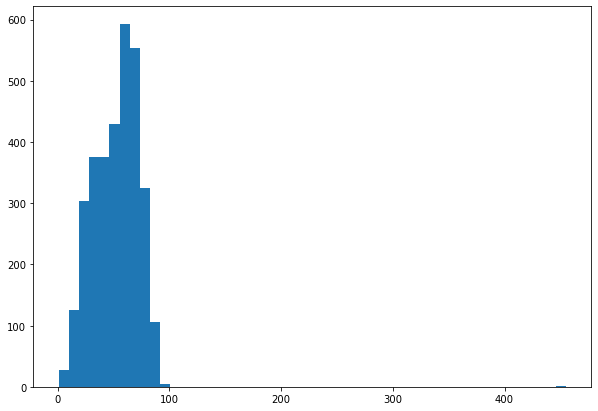

In [23]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data.Age,bins=50)
plt.show()

Here, from this histogram we can conclude that there is an outlier in age which is beyond value of 400.

In [24]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [25]:

thyroid_data["Category"]= thyroid_data["Category"].convert_dtypes()

converts to string

In [26]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
  
# Transform the data
thyroid_data[["Category"]] = ord_enc.fit_transform(thyroid_data[["Category"]])

converts string to float

In [27]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [28]:
thyroid_data.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.533375,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,6.322330,0.817138,1.951770,0.955914,107.551630,0.914312,0.988229,0.914933,110.261347,1.936976
std,20.378207,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,26.543102,0.386614,0.839899,0.205317,38.091518,0.279946,0.185982,0.279024,35.967317,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,0.000000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.580000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,1.000000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.500000,1.000000,1.900000,1.000000,102.000000,1.000000,0.970000,1.000000,106.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,1.000000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,1.000000,395.000000,3.000000


These shows the data information like mean , max value, min value etc...

In [29]:
thyroid_data.corr()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
Age,1.000000,0.000367,-0.008247,-0.027617,-0.060211,0.083025,-0.116037,-0.039672,0.042333,0.016471,...,-0.068555,0.077424,-0.225507,0.059138,-0.057514,0.088691,-0.178063,0.087615,0.030396,0.081616
FTI,0.000367,1.000000,-0.076430,0.040622,-0.024133,0.012635,-0.079948,-0.039364,-0.031658,-0.017944,...,-0.042115,0.075461,-0.071749,0.040915,-0.158643,0.001175,-0.219613,0.002115,-0.045531,0.087774
FTI Measured,-0.008247,-0.076430,1.000000,-0.000926,0.002649,-0.054187,0.009344,0.041605,0.084987,0.067247,...,0.018318,-0.169967,0.021385,-0.014113,0.170052,0.005001,0.057144,0.004250,0.130321,0.040597
Goitre,-0.027617,0.040622,-0.000926,1.000000,-0.012891,0.023781,0.028389,0.008892,-0.016360,-0.032564,...,-0.018997,-0.041248,-0.023449,0.026413,-0.016314,0.028498,-0.010817,0.028319,-0.011297,0.011243
Hypopituitary,-0.060211,-0.024133,0.002649,-0.012891,1.000000,-0.022426,0.063103,-0.011901,0.008970,-0.015647,...,-0.015825,0.010847,0.072704,-0.035842,-0.001597,-0.032106,0.057685,-0.032446,-0.036402,-0.005153
I131 Treatment,0.083025,0.012635,-0.054187,0.023781,-0.022426,1.000000,-0.025754,-0.024295,-0.028460,0.053747,...,-0.025432,0.034481,-0.098119,-0.005795,-0.042504,0.000444,-0.062347,-0.000030,-0.013623,0.039078
Lithium,-0.116037,-0.079948,0.009344,0.028389,0.063103,-0.025754,1.000000,-0.013667,-0.016011,-0.021293,...,-0.024853,0.016325,0.164580,0.025849,0.183348,0.036848,0.342384,0.036702,0.009021,-0.040256
On Antithyroid Medication,-0.039672,-0.039364,0.041605,0.008892,-0.011901,-0.024295,-0.013667,1.000000,-0.015104,-0.018870,...,0.037246,-0.025095,-0.015574,0.024385,-0.027386,-0.004817,0.027741,-0.005085,-0.037020,0.003504
On Thyroxine,0.042333,-0.031658,0.084987,-0.016360,0.008970,-0.028460,-0.016011,-0.015104,1.000000,0.041584,...,0.004755,-0.023103,0.024611,0.028566,-0.009286,0.023749,0.013913,0.023531,-0.018668,-0.023007
Pregnant,0.016471,-0.017944,0.067247,-0.032564,-0.015647,0.053747,-0.021293,-0.018870,0.041584,1.000000,...,0.045640,-0.079258,-0.070712,0.007959,-0.041065,-0.017573,0.000700,-0.018220,-0.039399,0.008966


These are correlation between the numerical columns. 

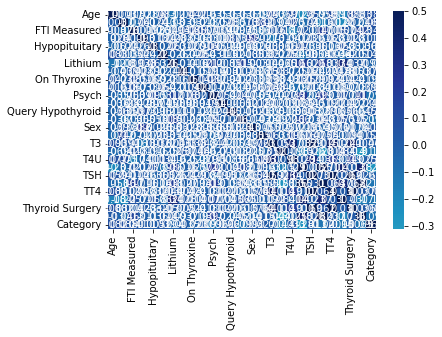

In [30]:
ax = sns.heatmap(thyroid_data.corr(), annot=True ,vmax=0.5,center=-0.5, cmap="YlGnBu",linecolor='black')

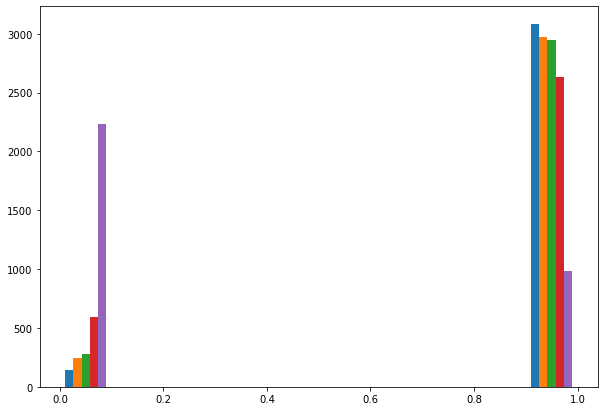

In [31]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data[['TSH','T3','TT4','T4U','FTI']],bins=10)
plt.show()

We have plotted histogram of all numerical columns , as we can see there is outlier in tsh,tt4,fti

In [32]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)   # threshold = 0 for constant
  
# fit the data
var_threshold.fit(thyroid_data)
  
# We can check the variance of different features as
print(var_threshold.variances_)

[4.15142397e+02 2.12409038e-01 9.51488317e-02 1.46801286e-02
 1.07481165e-02 4.18589548e-02 1.40773242e-02 1.25669396e-02
 1.70836353e-02 6.12163598e-02 5.98650138e-02 4.94272635e-03
 8.31222377e-03 2.74539147e-02 6.20539630e-04 4.38372019e-02
 7.08037839e-02 4.77995000e+02 1.49423784e-01 7.05211088e-01
 4.21421398e-02 4.28000000e+02 7.83452971e-02 3.45787047e-02
 7.78303976e-02 3.93000000e+02 2.13041337e-01]


18,22,26 columns are different from remaining columns, i.e, t3 measured,tsh measured, tumour

In [33]:
print(var_threshold.transform(thyroid_data))
print('*' * 10,"Separator",'*' * 10)
  
# shapes of data before transformed and after transformed
print("Earlier shape of data: ", thyroid_data.shape)
print("Shape after transformation: ", var_threshold.transform(thyroid_data).shape)

[[ 41.   0.   0. ...   1. 109.   2.]
 [ 23.   0.   0. ...   0. 106.   2.]
 [ 46.   1.   0. ...   1. 120.   2.]
 ...
 [ 50.   0.   0. ...   1. 122.   3.]
 [ 73.   0.   0. ...   1. 173.   3.]
 [ 73.   1.   0. ...   1.  72.   3.]]
********** Separator **********
Earlier shape of data:  (3221, 27)
Shape after transformation:  (3221, 27)


Now, after removing constant features we can find no change in dataset, next we will go with pearsons correlation.

In [34]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(thyroid_data, 0.9)
len(set(corr_features))

1

In [36]:
corr_features

{'Thyroid Surgery'}

In [37]:
thyroid_data['Thyroid Surgery'].corr(thyroid_data['TT4'])

0.9960320701296711

we can see that thyroid surgery column has more than 0.9 correlation coffecient with tt4 column

In [38]:
thyroid_data.corrwith(thyroid_data['Thyroid Surgery'])

Age                          0.087615
FTI                          0.002115
FTI Measured                 0.004250
Goitre                       0.028319
Hypopituitary               -0.032446
I131 Treatment              -0.000030
Lithium                      0.036702
On Antithyroid Medication   -0.005085
On Thyroxine                 0.023531
Pregnant                    -0.018220
Psych                       -0.011263
Query Hyperthyroid           0.021544
Query Hypothyroid            0.015829
Query on Thyroxine          -0.015172
Sex                          0.007600
Sick                         0.040341
T3                           0.409809
T3 Measured                  0.014107
T4U                          0.189706
T4U Measured                 0.010714
TSH                          0.693452
TSH Measured                 0.061903
TT4                          0.996032
TT4 Measured                 0.029890
Thyroid Surgery              1.000000
Tumor                        0.036132
Category    

In [39]:
thyroid_data.corrwith(thyroid_data['Category'])

Age                          0.081616
FTI                          0.087774
FTI Measured                 0.040597
Goitre                       0.011243
Hypopituitary               -0.005153
I131 Treatment               0.039078
Lithium                     -0.040256
On Antithyroid Medication    0.003504
On Thyroxine                -0.023007
Pregnant                     0.008966
Psych                       -0.096265
Query Hyperthyroid           0.009648
Query Hypothyroid            0.027309
Query on Thyroxine          -0.098504
Sex                          0.030405
Sick                         0.026753
T3                          -0.003961
T3 Measured                 -0.138844
T4U                          0.032851
T4U Measured                -0.276689
TSH                         -0.012940
TSH Measured                -0.124235
TT4                         -0.000948
TT4 Measured                -0.114990
Thyroid Surgery             -0.000647
Tumor                       -0.096473
Category    

here, we found the correlation between dependent column category and remaining independent columns

In [40]:
thyroid_data.corrwith(thyroid_data['TT4'])

Age                          0.088691
FTI                          0.001175
FTI Measured                 0.005001
Goitre                       0.028498
Hypopituitary               -0.032106
I131 Treatment               0.000444
Lithium                      0.036848
On Antithyroid Medication   -0.004817
On Thyroxine                 0.023749
Pregnant                    -0.017573
Psych                       -0.010646
Query Hyperthyroid           0.021630
Query Hypothyroid            0.015981
Query on Thyroxine          -0.014744
Sex                          0.007631
Sick                         0.040695
T3                           0.407821
T3 Measured                  0.014491
T4U                          0.188032
T4U Measured                 0.011476
TSH                          0.696096
TSH Measured                 0.063654
TT4                          1.000000
TT4 Measured                 0.030009
Thyroid Surgery              0.996032
Tumor                        0.036677
Category    

In [41]:
thyroid_data=thyroid_data.drop(corr_features,axis=1)


In [42]:
thyroid_data.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.533375,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.923316,6.322330,0.817138,1.951770,0.955914,107.551630,0.914312,0.988229,110.261347,1.936976
std,20.378207,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.266131,26.543102,0.386614,0.839899,0.205317,38.091518,0.279946,0.185982,35.967317,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.580000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.500000,1.000000,1.900000,1.000000,102.000000,1.000000,0.970000,106.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,395.000000,3.000000


In [43]:
r=thyroid_data.max()-thyroid_data.min()

In [44]:
r

Age                          454.000
FTI                            1.000
FTI Measured                   1.000
Goitre                         1.000
Hypopituitary                  1.000
I131 Treatment                 1.000
Lithium                        1.000
On Antithyroid Medication      1.000
On Thyroxine                   1.000
Pregnant                       1.000
Psych                          1.000
Query Hyperthyroid             1.000
Query Hypothyroid              1.000
Query on Thyroxine             1.000
Sex                            1.000
Sick                           1.000
T3                             1.000
T3 Measured                  477.995
T4U                            1.000
T4U Measured                  10.550
TSH                            1.000
TSH Measured                 428.000
TT4                            1.000
TT4 Measured                   1.810
Tumor                        393.000
Category                       3.000
dtype: float64

[0.07969699 0.01341547 0.02065021 0.00472344 0.00234942 0.00759868
 0.00396593 0.00367718 0.00530003 0.01129452 0.01034109 0.00191948
 0.00197616 0.00853226 0.00115631 0.00548412 0.01073607 0.30342093
 0.01124318 0.23117291 0.00335048 0.15835352 0.00767739 0.09196424]


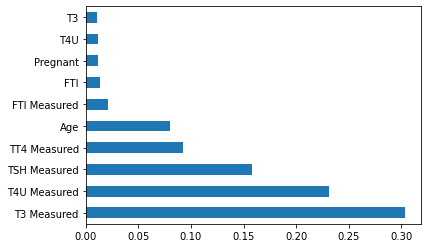

In [45]:

X = thyroid_data.iloc[:,0:24]  #independent columns
y = thyroid_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

using mean in place of nan values

In [46]:
# Binarize Category Columns
binary_cols = ['On Thyroxine', 'Query on Thyroxine', 'Sex',
               'On Antithyroid Medication', 'Sick', 'Pregnant', 
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
               'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
               'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 
               'TT4 Measured', 'T4U Measured', 'FTI Measured']

for col in binary_cols: convert_category(thyroid_data1, col)

In [47]:
# Convert '?' to np.nan and convert numeric data to numeric dtype
for col in thyroid_data1.columns: 
    if col != 'Category':
        thyroid_data1.loc[thyroid_data1[col] == '?', col] = np.nan
        thyroid_data1[col] = pd.to_numeric(thyroid_data1[col])

In [48]:
curr_columns = thyroid_data1.columns.difference(['Category'])

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imputer.fit_transform(thyroid_data1.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)

thyroid_data_mean= pd.concat([
                    imputed_data.reset_index(), 
                    thyroid_data1['Category'].reset_index()], 
                    axis=1).drop('index', axis=1)

In [49]:
thyroid_data_mean.shape

(3221, 27)

In [50]:
thyroid_data_mean.dtypes

Age                          float64
FTI                          float64
FTI Measured                 float64
Goitre                       float64
Hypopituitary                float64
I131 Treatment               float64
Lithium                      float64
On Antithyroid Medication    float64
On Thyroxine                 float64
Pregnant                     float64
Psych                        float64
Query Hyperthyroid           float64
Query Hypothyroid            float64
Query on Thyroxine           float64
Sex                          float64
Sick                         float64
T3                           float64
T3 Measured                  float64
T4U                          float64
T4U Measured                 float64
TSH                          float64
TSH Measured                 float64
TT4                          float64
TT4 Measured                 float64
Thyroid Surgery              float64
Tumor                        float64
Category                      object
d

In [51]:
thyroid_data_mean.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,1.0,2.500000,1.0,125.0,1.0,1.140000,1.0,109.00000,negative
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,1.0,2.000000,1.0,102.0,0.0,0.989937,0.0,110.65755,negative
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,0.0,1.963355,1.0,109.0,1.0,0.910000,1.0,120.00000,negative
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.0,1.900000,1.0,175.0,0.0,0.989937,0.0,110.65755,negative
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.0,1.200000,1.0,61.0,1.0,0.870000,1.0,70.00000,negative


In [52]:
thyroid_data_mean.isnull().sum()

Age                          0
FTI                          0
FTI Measured                 0
Goitre                       0
Hypopituitary                0
I131 Treatment               0
Lithium                      0
On Antithyroid Medication    0
On Thyroxine                 0
Pregnant                     0
Psych                        0
Query Hyperthyroid           0
Query Hypothyroid            0
Query on Thyroxine           0
Sex                          0
Sick                         0
T3                           0
T3 Measured                  0
T4U                          0
T4U Measured                 0
TSH                          0
TSH Measured                 0
TT4                          0
TT4 Measured                 0
Thyroid Surgery              0
Tumor                        0
Category                     0
dtype: int64

In [53]:
thyroid_data_mean.Age

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3216    82.0
3217    79.0
3218    50.0
3219    73.0
3220    73.0
Name: Age, Length: 3221, dtype: float64

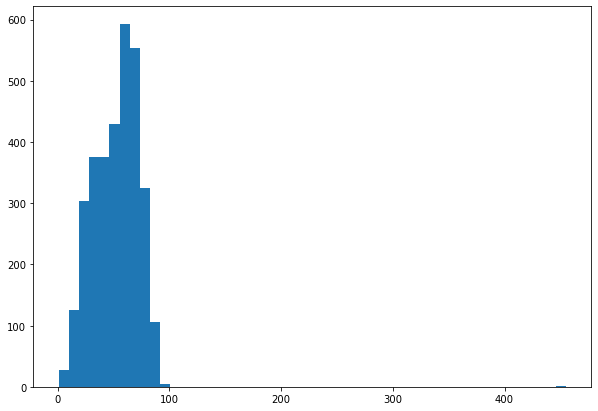

In [54]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data_mean.Age,bins=50)
plt.show()

Here, from this histogram we can conclude that there is an outlier in age which is beyond value of 400.

In [55]:

thyroid_data_mean["Category"]= thyroid_data_mean["Category"].convert_dtypes()

In [56]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
  
# Transform the data
thyroid_data_mean[["Category"]] = ord_enc.fit_transform(thyroid_data_mean[["Category"]])

In [57]:
thyroid_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [58]:
thyroid_data_mean.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.532609,0.318681,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,6.722840,0.817138,1.963355,0.955914,107.807665,0.914312,0.989937,0.914933,110.657550,1.936976
std,20.378161,0.456757,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,26.506683,0.386614,0.839542,0.205317,38.072850,0.279946,0.185899,0.279024,35.943832,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,0.000000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.580000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,1.000000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.700000,1.000000,1.963355,1.000000,104.000000,1.000000,0.989937,1.000000,109.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.200000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,1.000000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,1.000000,395.000000,3.000000


These shows the data information like mean , max value, min value etc...

In [59]:
thyroid_data_mean.corr()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
Age,1.000000,-0.003142,-0.008356,-0.027613,-0.060207,0.083034,-0.116033,-0.039668,0.042051,0.016481,...,-7.350458e-02,7.740668e-02,-2.278420e-01,5.913033e-02,-5.940641e-02,8.868013e-02,-1.807724e-01,8.760397e-02,2.721146e-02,0.081611
FTI,-0.003142,1.000000,-0.080309,0.037611,-0.027238,0.010041,-0.082168,-0.042850,-0.030635,-0.021890,...,-3.722819e-02,7.964204e-02,-7.101360e-02,3.347952e-02,-1.601452e-01,-4.323726e-03,-2.223507e-01,-3.454337e-03,-4.359990e-02,0.085296
FTI Measured,-0.008356,-0.080309,1.000000,-0.000926,0.002649,-0.054187,0.009344,0.041605,0.084987,0.067247,...,1.748983e-02,-1.699674e-01,2.635329e-02,-1.411341e-02,1.705772e-01,5.001363e-03,5.701943e-02,4.249517e-03,1.302522e-01,0.040597
Goitre,-0.027613,0.037611,-0.000926,1.000000,-0.012891,0.023781,0.028389,0.008892,-0.016360,-0.032564,...,-1.229710e-02,-4.124834e-02,-2.225560e-02,2.641344e-02,-1.714909e-02,2.849825e-02,-1.167711e-02,2.831861e-02,-1.232806e-02,0.011243
Hypopituitary,-0.060207,-0.027238,0.002649,-0.012891,1.000000,-0.022426,0.063103,-0.011901,0.008970,-0.015647,...,-1.565993e-02,1.084723e-02,7.241866e-02,-3.584183e-02,-4.749634e-04,-3.210648e-02,5.867515e-02,-3.244579e-02,-3.525310e-02,-0.005153
I131 Treatment,0.083034,0.010041,-0.054187,0.023781,-0.022426,1.000000,-0.025754,-0.024295,-0.028460,0.053747,...,-2.660698e-02,3.448086e-02,-9.916637e-02,-5.794653e-03,-4.234328e-02,4.443466e-04,-6.238857e-02,-3.039641e-05,-1.363088e-02,0.039078
Lithium,-0.116033,-0.082168,0.009344,0.028389,0.063103,-0.025754,1.000000,-0.013667,-0.016011,-0.021293,...,-2.464362e-02,1.632518e-02,1.641735e-01,2.584916e-02,1.826282e-01,3.684843e-02,3.414320e-01,3.670221e-02,7.699876e-03,-0.040256
On Antithyroid Medication,-0.039668,-0.042850,0.041605,0.008892,-0.011901,-0.024295,-0.013667,1.000000,-0.015104,-0.018870,...,3.558130e-02,-2.509458e-02,-1.484891e-02,2.438472e-02,-2.816344e-02,-4.816631e-03,2.789779e-02,-5.085259e-03,-3.686079e-02,0.003504
On Thyroxine,0.042051,-0.030635,0.084987,-0.016360,0.008970,-0.028460,-0.016011,-0.015104,1.000000,0.041584,...,2.751588e-03,-2.310270e-02,2.529519e-02,2.856581e-02,-1.018519e-02,2.374868e-02,1.320636e-02,2.353105e-02,-1.953129e-02,-0.023007
Pregnant,0.016481,-0.021890,0.067247,-0.032564,-0.015647,0.053747,-0.021293,-0.018870,0.041584,1.000000,...,4.318508e-02,-7.925753e-02,-6.842952e-02,7.958935e-03,-4.133423e-02,-1.757293e-02,1.228252e-03,-1.822024e-02,-3.876590e-02,0.008966


These are correlation between the numerical columns. 

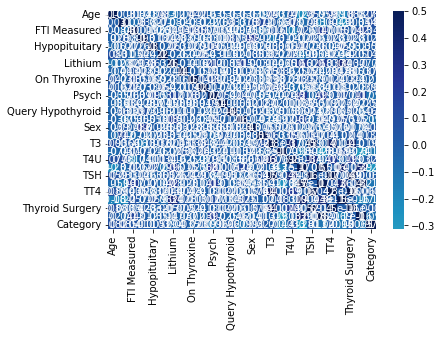

In [60]:
ax = sns.heatmap(thyroid_data_mean.corr(), annot=True ,vmax=0.5,center=-0.5, cmap="YlGnBu",linecolor='black')

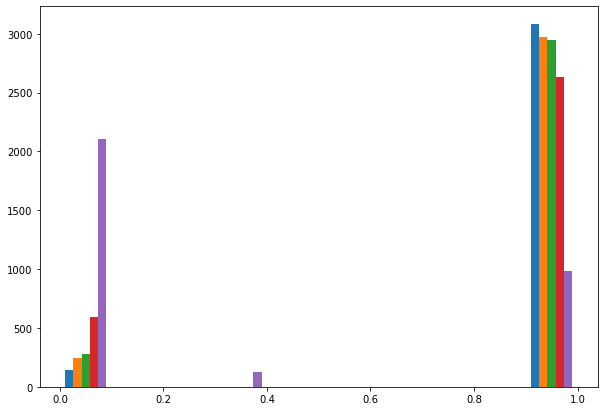

In [61]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data_mean[['TSH','T3','TT4','T4U','FTI']],bins=10)
plt.show()

We have plotted histogram of all numerical columns , as we can see there is outlier in tsh,tt4,fti

In [62]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)   # threshold = 0 for constant
  
# fit the data
var_threshold.fit(thyroid_data_mean)
  
# We can check the variance of different features as
print(var_threshold.variances_)

[4.15140508e+02 2.08562626e-01 9.51488317e-02 1.46801286e-02
 1.07481165e-02 4.18589548e-02 1.40773242e-02 1.25669396e-02
 1.70836353e-02 6.12163598e-02 5.98650138e-02 4.94272635e-03
 8.31222377e-03 2.74539147e-02 6.20539630e-04 4.38372019e-02
 7.08037839e-02 4.77995000e+02 1.49423784e-01 7.04611325e-01
 4.21421398e-02 4.28000000e+02 7.83452971e-02 3.45475642e-02
 7.78303976e-02 3.93000000e+02 2.13041337e-01]


In [63]:
print(var_threshold.transform(thyroid_data_mean))
print('*' * 10,"Separator",'*' * 10)
  
# shapes of data before transformed and after transformed
print("Earlier shape of data: ", thyroid_data_mean.shape)
print("Shape after transformation: ", var_threshold.transform(thyroid_data_mean).shape)

[[ 41.           0.           0.         ...   1.         109.
    2.        ]
 [ 23.           0.           0.         ...   0.         110.65755005
    2.        ]
 [ 46.           1.           0.         ...   1.         120.
    2.        ]
 ...
 [ 50.           0.           0.         ...   1.         122.
    3.        ]
 [ 73.           0.31868132   0.         ...   1.         173.
    3.        ]
 [ 73.           1.           0.         ...   1.          72.
    3.        ]]
********** Separator **********
Earlier shape of data:  (3221, 27)
Shape after transformation:  (3221, 27)


Now, after removing constant features we can find no change in dataset, next we will go with pearsons correlation.

In [64]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [65]:
corr_features = correlation(thyroid_data_mean, 0.9)
len(set(corr_features))

1

In [66]:
corr_features

{'Thyroid Surgery'}

In [67]:
thyroid_data_mean['Thyroid Surgery'].corr(thyroid_data_mean['TT4'])

0.9960320701296711

we can see that thyroid surgery column has more than 0.9 correlation coffecient with tt4 column

In [68]:
thyroid_data_mean.corrwith(thyroid_data_mean['Thyroid Surgery'])

Age                          8.760397e-02
FTI                         -3.454337e-03
FTI Measured                 4.249517e-03
Goitre                       2.831861e-02
Hypopituitary               -3.244579e-02
I131 Treatment              -3.039641e-05
Lithium                      3.670221e-02
On Antithyroid Medication   -5.085259e-03
On Thyroxine                 2.353105e-02
Pregnant                    -1.822024e-02
Psych                       -1.126270e-02
Query Hyperthyroid           2.154424e-02
Query Hypothyroid            1.582887e-02
Query on Thyroxine          -1.517171e-02
Sex                          7.600457e-03
Sick                         4.034113e-02
T3                           4.098091e-01
T3 Measured                 -7.363164e-03
T4U                          1.897063e-01
T4U Measured                 5.183752e-03
TSH                          6.934523e-01
TSH Measured                 4.021494e-02
TT4                          9.960321e-01
TT4 Measured                 7.577

In [69]:
thyroid_data_mean.corrwith(thyroid_data_mean['Category'])

Age                          0.081611
FTI                          0.085296
FTI Measured                 0.040597
Goitre                       0.011243
Hypopituitary               -0.005153
I131 Treatment               0.039078
Lithium                     -0.040256
On Antithyroid Medication    0.003504
On Thyroxine                -0.023007
Pregnant                     0.008966
Psych                       -0.096265
Query Hyperthyroid           0.009648
Query Hypothyroid            0.027309
Query on Thyroxine          -0.098504
Sex                          0.030405
Sick                         0.026753
T3                          -0.003961
T3 Measured                 -0.138827
T4U                          0.032851
T4U Measured                -0.277765
TSH                         -0.012940
TSH Measured                -0.123891
TT4                         -0.000948
TT4 Measured                -0.115013
Thyroid Surgery             -0.000647
Tumor                       -0.096512
Category    

here, we found the correlation between dependent column category and remaining independent columns

In [70]:
thyroid_data_mean.corrwith(thyroid_data_mean['TT4'])

Age                          8.868013e-02
FTI                         -4.323726e-03
FTI Measured                 5.001363e-03
Goitre                       2.849825e-02
Hypopituitary               -3.210648e-02
I131 Treatment               4.443466e-04
Lithium                      3.684843e-02
On Antithyroid Medication   -4.816631e-03
On Thyroxine                 2.374868e-02
Pregnant                    -1.757293e-02
Psych                       -1.064577e-02
Query Hyperthyroid           2.163007e-02
Query Hypothyroid            1.598073e-02
Query on Thyroxine          -1.474352e-02
Sex                          7.630736e-03
Sick                         4.069518e-02
T3                           4.078209e-01
T3 Measured                 -6.874554e-03
T4U                          1.880325e-01
T4U Measured                 5.994812e-03
TSH                          6.960965e-01
TSH Measured                 4.188350e-02
TT4                          1.000000e+00
TT4 Measured                 7.287

In [71]:
thyroid_data_mean=thyroid_data_mean.drop(corr_features,axis=1)


In [72]:
thyroid_data_mean.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.532609,0.318681,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.923316,6.722840,0.817138,1.963355,0.955914,107.807665,0.914312,0.989937,110.657550,1.936976
std,20.378161,0.456757,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.266131,26.506683,0.386614,0.839542,0.205317,38.072850,0.279946,0.185899,35.943832,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.580000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.700000,1.000000,1.963355,1.000000,104.000000,1.000000,0.989937,109.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.200000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,395.000000,3.000000


In [73]:
r=thyroid_data_mean.max()-thyroid_data_mean.min()

In [74]:
r

Age                          454.000
FTI                            1.000
FTI Measured                   1.000
Goitre                         1.000
Hypopituitary                  1.000
I131 Treatment                 1.000
Lithium                        1.000
On Antithyroid Medication      1.000
On Thyroxine                   1.000
Pregnant                       1.000
Psych                          1.000
Query Hyperthyroid             1.000
Query Hypothyroid              1.000
Query on Thyroxine             1.000
Sex                            1.000
Sick                           1.000
T3                             1.000
T3 Measured                  477.995
T4U                            1.000
T4U Measured                  10.550
TSH                            1.000
TSH Measured                 428.000
TT4                            1.000
TT4 Measured                   1.810
Tumor                        393.000
Category                       3.000
dtype: float64

[0.07858265 0.0192782  0.02038239 0.00510972 0.00201762 0.00776873
 0.00435781 0.00357976 0.00505002 0.0117308  0.00957682 0.00219314
 0.00184739 0.008581   0.00094255 0.00587881 0.0137965  0.30168702
 0.01167075 0.2252183  0.00306342 0.15721137 0.00758285 0.09289239]


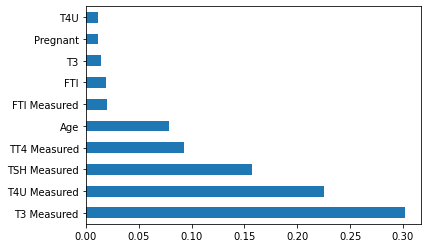

In [75]:

X = thyroid_data_mean.iloc[:,0:24]  #independent columns
y = thyroid_data_mean.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

replacing with mode values


In [76]:
# Binarize Category Columns
binary_cols = ['On Thyroxine', 'Query on Thyroxine', 'Sex',
               'On Antithyroid Medication', 'Sick', 'Pregnant', 
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 
               'Query Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 
               'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 
               'TT4 Measured', 'T4U Measured', 'FTI Measured']

for col in binary_cols: convert_category(thyroid_data1, col)

In [77]:
# Convert '?' to np.nan and convert numeric data to numeric dtype
for col in thyroid_data1.columns: 
    if col != 'Category':
        thyroid_data1.loc[thyroid_data1[col] == '?', col] = np.nan
        thyroid_data1[col] = pd.to_numeric(thyroid_data1[col])

In [78]:
curr_columns = thyroid_data1.columns.difference(['Category'])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_data = imputer.fit_transform(thyroid_data1.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)

thyroid_data_mode= pd.concat([
                    imputed_data.reset_index(), 
                    thyroid_data1['Category'].reset_index()], 
                    axis=1).drop('index', axis=1)

In [79]:
thyroid_data_mode.shape

(3221, 27)

In [80]:
thyroid_data_mode.dtypes

Age                          float64
FTI                          float64
FTI Measured                 float64
Goitre                       float64
Hypopituitary                float64
I131 Treatment               float64
Lithium                      float64
On Antithyroid Medication    float64
On Thyroxine                 float64
Pregnant                     float64
Psych                        float64
Query Hyperthyroid           float64
Query Hypothyroid            float64
Query on Thyroxine           float64
Sex                          float64
Sick                         float64
T3                           float64
T3 Measured                  float64
T4U                          float64
T4U Measured                 float64
TSH                          float64
TSH Measured                 float64
TT4                          float64
TT4 Measured                 float64
Thyroid Surgery              float64
Tumor                        float64
Category                      object
d

In [81]:
thyroid_data_mode.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,1.0,2.5,1.0,125.0,1.0,1.14,1.0,109.0,negative
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,1.0,2.0,1.0,102.0,0.0,0.99,0.0,93.0,negative
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,0.0,2.0,1.0,109.0,1.0,0.91,1.0,120.0,negative
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.0,1.9,1.0,175.0,0.0,0.99,0.0,93.0,negative
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.0,1.2,1.0,61.0,1.0,0.87,1.0,70.0,negative


In [82]:
thyroid_data_mode.isnull().sum()

Age                          0
FTI                          0
FTI Measured                 0
Goitre                       0
Hypopituitary                0
I131 Treatment               0
Lithium                      0
On Antithyroid Medication    0
On Thyroxine                 0
Pregnant                     0
Psych                        0
Query Hyperthyroid           0
Query Hypothyroid            0
Query on Thyroxine           0
Sex                          0
Sick                         0
T3                           0
T3 Measured                  0
T4U                          0
T4U Measured                 0
TSH                          0
TSH Measured                 0
TT4                          0
TT4 Measured                 0
Thyroid Surgery              0
Tumor                        0
Category                     0
dtype: int64

In [83]:
thyroid_data_mode.Age

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3216    82.0
3217    79.0
3218    50.0
3219    73.0
3220    73.0
Name: Age, Length: 3221, dtype: float64

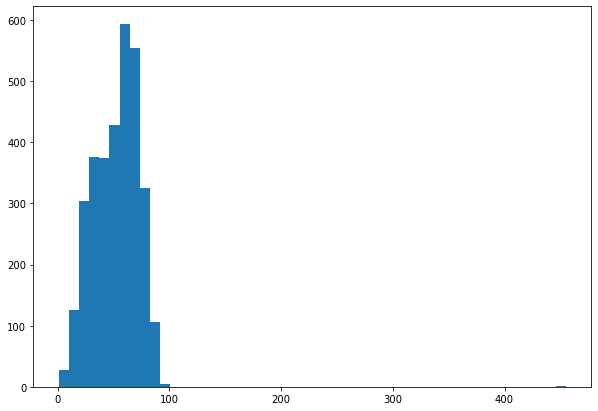

In [84]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data_mode.Age,bins=50)
plt.show()

Here, from this histogram we can conclude that there is an outlier in age which is beyond value of 400.

In [85]:

thyroid_data_mode["Category"]= thyroid_data_mode["Category"].convert_dtypes()

In [86]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
  
# Transform the data
thyroid_data_mode[["Category"]] = ord_enc.fit_transform(thyroid_data_mode[["Category"]])

In [87]:
thyroid_data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3221 non-null   float64
 1   FTI                        3221 non-null   float64
 2   FTI Measured               3221 non-null   float64
 3   Goitre                     3221 non-null   float64
 4   Hypopituitary              3221 non-null   float64
 5   I131 Treatment             3221 non-null   float64
 6   Lithium                    3221 non-null   float64
 7   On Antithyroid Medication  3221 non-null   float64
 8   On Thyroxine               3221 non-null   float64
 9   Pregnant                   3221 non-null   float64
 10  Psych                      3221 non-null   float64
 11  Query Hyperthyroid         3221 non-null   float64
 12  Query Hypothyroid          3221 non-null   float64
 13  Query on Thyroxine         3221 non-null   float

In [88]:
thyroid_data_mode.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.534617,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,6.222640,0.817138,1.970056,0.955914,107.507544,0.914312,0.989942,0.914933,109.155480,1.936976
std,20.378479,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,26.563466,0.386614,0.839661,0.205317,38.098498,0.279946,0.185899,0.279024,36.279929,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,0.000000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,1.000000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.300000,1.000000,2.000000,1.000000,101.000000,1.000000,0.990000,1.000000,104.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,1.000000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,1.000000,395.000000,3.000000


These shows the data information like mean , max value, min value etc...

In [89]:
thyroid_data_mode.corr()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
Age,1.000000,0.000326,-0.008070,-0.027624,-0.060217,0.083011,-0.116043,-0.039678,0.042791,0.016455,...,-0.067307,0.077452,-0.229167,0.059151,-0.057164,0.088709,-0.180868,0.087633,0.038956,0.081623
FTI,0.000326,1.000000,-0.076430,0.040622,-0.024133,0.012635,-0.079948,-0.039364,-0.031658,-0.017944,...,-0.041964,0.075461,-0.075244,0.040915,-0.158393,0.001175,-0.219747,0.002115,-0.044928,0.087774
FTI Measured,-0.008070,-0.076430,1.000000,-0.000926,0.002649,-0.054187,0.009344,0.041605,0.084987,0.067247,...,0.018516,-0.169967,0.029217,-0.014113,0.169945,0.005001,0.057019,0.004250,0.129623,0.040597
Goitre,-0.027624,0.040622,-0.000926,1.000000,-0.012891,0.023781,0.028389,0.008892,-0.016360,-0.032564,...,-0.020653,-0.041248,-0.021556,0.026413,-0.016169,0.028498,-0.011680,0.028319,-0.008368,0.011243
Hypopituitary,-0.060217,-0.024133,0.002649,-0.012891,1.000000,-0.022426,0.063103,-0.011901,0.008970,-0.015647,...,-0.015859,0.010847,0.072225,-0.035842,-0.001790,-0.032106,0.058678,-0.032446,-0.039333,-0.005153
I131 Treatment,0.083011,0.012635,-0.054187,0.023781,-0.022426,1.000000,-0.025754,-0.024295,-0.028460,0.053747,...,-0.025129,0.034481,-0.099734,-0.005795,-0.042527,0.000444,-0.062389,-0.000030,-0.013509,0.039078
Lithium,-0.116043,-0.079948,0.009344,0.028389,0.063103,-0.025754,1.000000,-0.013667,-0.016011,-0.021293,...,-0.024895,0.016325,0.163875,0.025849,0.183454,0.036848,0.341429,0.036702,0.012613,-0.040256
On Antithyroid Medication,-0.039678,-0.039364,0.041605,0.008892,-0.011901,-0.024295,-0.013667,1.000000,-0.015104,-0.018870,...,0.037644,-0.025095,-0.014423,0.024385,-0.027250,-0.004817,0.027898,-0.005085,-0.037210,0.003504
On Thyroxine,0.042791,-0.031658,0.084987,-0.016360,0.008970,-0.028460,-0.016011,-0.015104,1.000000,0.041584,...,0.005251,-0.023103,0.025681,0.028566,-0.009130,0.023749,0.013204,0.023531,-0.016155,-0.023007
Pregnant,0.016455,-0.017944,0.067247,-0.032564,-0.015647,0.053747,-0.021293,-0.018870,0.041584,1.000000,...,0.046230,-0.079258,-0.067082,0.007959,-0.041014,-0.017573,0.001230,-0.018220,-0.040881,0.008966


These are correlation between the numerical columns. 

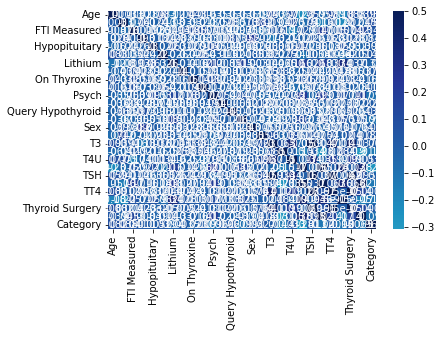

In [90]:
ax = sns.heatmap(thyroid_data_mode.corr(), annot=True ,vmax=0.5,center=-0.5, cmap="YlGnBu",linecolor='black')

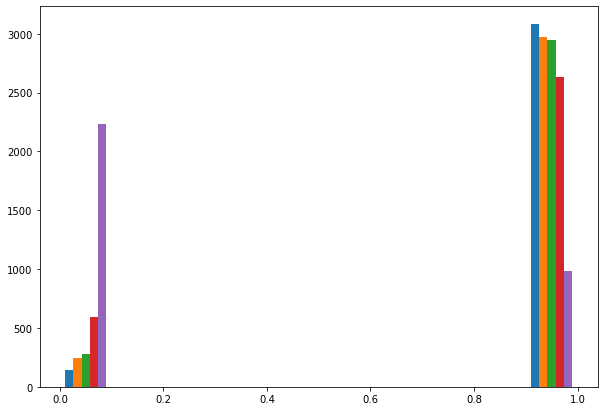

In [91]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data_mode[['TSH','T3','TT4','T4U','FTI']],bins=10)
plt.show()

We have plotted histogram of all numerical columns , as we can see there is outlier in tsh,tt4,fti

In [92]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)   # threshold = 0 for constant
  
# fit the data
var_threshold.fit(thyroid_data_mode)
  
# We can check the variance of different features as
print(var_threshold.variances_)

[4.15153490e+02 2.12409038e-01 9.51488317e-02 1.46801286e-02
 1.07481165e-02 4.18589548e-02 1.40773242e-02 1.25669396e-02
 1.70836353e-02 6.12163598e-02 5.98650138e-02 4.94272635e-03
 8.31222377e-03 2.74539147e-02 6.20539630e-04 4.38372019e-02
 7.08037839e-02 4.77995000e+02 1.49423784e-01 7.04811981e-01
 4.21421398e-02 4.28000000e+02 7.83452971e-02 3.45475645e-02
 7.78303976e-02 3.93000000e+02 2.13041337e-01]


In [93]:
print(var_threshold.transform(thyroid_data_mode))
print('*' * 10,"Separator",'*' * 10)
  
# shapes of data before transformed and after transformed
print("Earlier shape of data: ", thyroid_data_mode.shape)
print("Shape after transformation: ", var_threshold.transform(thyroid_data_mode).shape)

[[ 41.   0.   0. ...   1. 109.   2.]
 [ 23.   0.   0. ...   0.  93.   2.]
 [ 46.   1.   0. ...   1. 120.   2.]
 ...
 [ 50.   0.   0. ...   1. 122.   3.]
 [ 73.   0.   0. ...   1. 173.   3.]
 [ 73.   1.   0. ...   1.  72.   3.]]
********** Separator **********
Earlier shape of data:  (3221, 27)
Shape after transformation:  (3221, 27)


Now, after removing constant features we can find no change in dataset, next we will go with pearsons correlation.

In [94]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [95]:
corr_features = correlation(thyroid_data_mode, 0.9)
len(set(corr_features))

1

In [96]:
corr_features

{'Thyroid Surgery'}

In [97]:
thyroid_data_mode['Thyroid Surgery'].corr(thyroid_data_mode['TT4'])

0.9960320701296711

we can see that thyroid surgery column has more than 0.9 correlation coffecient with tt4 column

In [98]:
thyroid_data_mode.corrwith(thyroid_data_mode['Thyroid Surgery'])

Age                          0.087633
FTI                          0.002115
FTI Measured                 0.004250
Goitre                       0.028319
Hypopituitary               -0.032446
I131 Treatment              -0.000030
Lithium                      0.036702
On Antithyroid Medication   -0.005085
On Thyroxine                 0.023531
Pregnant                    -0.018220
Psych                       -0.011263
Query Hyperthyroid           0.021544
Query Hypothyroid            0.015829
Query on Thyroxine          -0.015172
Sex                          0.007600
Sick                         0.040341
T3                           0.409809
T3 Measured                  0.019434
T4U                          0.189706
T4U Measured                 0.001982
TSH                          0.693452
TSH Measured                 0.065629
TT4                          0.996032
TT4 Measured                -0.000095
Thyroid Surgery              1.000000
Tumor                        0.135802
Category    

In [99]:
thyroid_data_mode.corrwith(thyroid_data_mode['Category'])

Age                          0.081623
FTI                          0.087774
FTI Measured                 0.040597
Goitre                       0.011243
Hypopituitary               -0.005153
I131 Treatment               0.039078
Lithium                     -0.040256
On Antithyroid Medication    0.003504
On Thyroxine                -0.023007
Pregnant                     0.008966
Psych                       -0.096265
Query Hyperthyroid           0.009648
Query Hypothyroid            0.027309
Query on Thyroxine          -0.098504
Sex                          0.030405
Sick                         0.026753
T3                          -0.003961
T3 Measured                 -0.138789
T4U                          0.032851
T4U Measured                -0.278280
TSH                         -0.012940
TSH Measured                -0.124282
TT4                         -0.000948
TT4 Measured                -0.115013
Thyroid Surgery             -0.000647
Tumor                       -0.095706
Category    

here, we found the correlation between dependent column category and remaining independent columns

In [100]:
thyroid_data_mode.corrwith(thyroid_data_mode['TT4'])

Age                          0.088709
FTI                          0.001175
FTI Measured                 0.005001
Goitre                       0.028498
Hypopituitary               -0.032106
I131 Treatment               0.000444
Lithium                      0.036848
On Antithyroid Medication   -0.004817
On Thyroxine                 0.023749
Pregnant                    -0.017573
Psych                       -0.010646
Query Hyperthyroid           0.021630
Query Hypothyroid            0.015981
Query on Thyroxine          -0.014744
Sex                          0.007631
Sick                         0.040695
T3                           0.407821
T3 Measured                  0.019791
T4U                          0.188032
T4U Measured                 0.002821
TSH                          0.696096
TSH Measured                 0.067393
TT4                          1.000000
TT4 Measured                -0.000095
Thyroid Surgery              0.996032
Tumor                        0.135945
Category    

In [101]:
thyroid_data_mode=thyroid_data_mode.drop(corr_features,axis=1)


In [102]:
thyroid_data_mode.describe()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Tumor,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.534617,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.923316,6.222640,0.817138,1.970056,0.955914,107.507544,0.914312,0.989942,109.155480,1.936976
std,20.378479,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.266131,26.563466,0.386614,0.839661,0.205317,38.098498,0.279946,0.185899,36.279929,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.200000,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,93.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.300000,1.000000,2.000000,1.000000,101.000000,1.000000,0.990000,104.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,123.000000,2.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,478.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,395.000000,3.000000


In [103]:
r=thyroid_data_mode.max()-thyroid_data_mode.min()

In [104]:
r

Age                          454.000
FTI                            1.000
FTI Measured                   1.000
Goitre                         1.000
Hypopituitary                  1.000
I131 Treatment                 1.000
Lithium                        1.000
On Antithyroid Medication      1.000
On Thyroxine                   1.000
Pregnant                       1.000
Psych                          1.000
Query Hyperthyroid             1.000
Query Hypothyroid              1.000
Query on Thyroxine             1.000
Sex                            1.000
Sick                           1.000
T3                             1.000
T3 Measured                  477.995
T4U                            1.000
T4U Measured                  10.550
TSH                            1.000
TSH Measured                 428.000
TT4                            1.000
TT4 Measured                   1.810
Tumor                        393.000
Category                       3.000
dtype: float64

In [105]:
thyroid_data_mode

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Tumor,Category
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.300,1.0,2.5,1.0,125.0,1.0,1.14,109.0,2.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.100,1.0,2.0,1.0,102.0,0.0,0.99,93.0,2.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.980,0.0,2.0,1.0,109.0,1.0,0.91,120.0,2.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.160,1.0,1.9,1.0,175.0,0.0,0.99,93.0,2.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.720,1.0,1.2,1.0,61.0,1.0,0.87,70.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.200,1.0,1.0,1.0,68.0,1.0,0.77,88.0,3.0
3217,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.100,1.0,0.7,1.0,116.0,1.0,0.85,137.0,3.0
3218,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,4.800,1.0,0.6,1.0,98.0,1.0,0.80,122.0,3.0
3219,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.015,1.0,1.8,1.0,173.0,1.0,1.00,173.0,3.0


[0.0585402  0.01468021 0.02385558 0.00471581 0.0018005  0.00712731
 0.00360642 0.00407234 0.00400658 0.01180834 0.00894871 0.00180296
 0.00150998 0.00842717 0.00087966 0.00516443 0.01037898 0.28695805
 0.01079527 0.21923613 0.0025443  0.10737391 0.00634814 0.06589479
 0.12952423]
T3 Measured     0.286958
T4U Measured    0.219236
Tumor           0.129524
TSH Measured    0.107374
TT4 Measured    0.065895
Age             0.058540
FTI Measured    0.023856
FTI             0.014680
Pregnant        0.011808
T4U             0.010795
dtype: float64


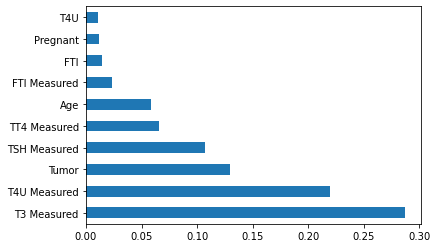

In [106]:

X = thyroid_data_mode.iloc[:,0:25]  #independent columns
y = thyroid_data_mode.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10))
plt.show()

the most important feature is t3 measured

In [107]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = thyroid_data.iloc[:,0:25]  #independent columns
y = thyroid_data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
17         T3 Measured  28801.041090
24               Tumor   6334.645972
21        TSH Measured   6090.610922
0                  Age    466.875258
19        T4U Measured    216.377112
10               Psych     64.466023
13  Query on Thyroxine     48.097591
2         FTI Measured     31.997251
9             Pregnant     19.733249
6              Lithium     19.490068


univariate feature selection

In [108]:
X.shape

(3221, 25)

In [109]:
y.shape

(3221,)

In [110]:
pip install mlxtend

In [111]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [112]:
#calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [113]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished

[2022-08-19 16:45:39] Features: 1/4 -- score: -0.19757467889439467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2022-08-19 16:45:40] Features: 2/4 -- score: -0.1967954994447711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2022-08-19 16:45:40] Features: 3/4 -- score: -0.1963094340048194[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [114]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['FTI', 'FTI Measured', 'Query on Thyroxine', 'T4U Measured']


using forward feature selection

In [115]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [116]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished
Features: 24/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished
Features: 23/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished
Features: 22/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished
Features: 21/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished
Features: 20/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
Features: 19/4[Parallel(

In [117]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['FTI', 'FTI Measured', 'Query on Thyroxine', 'T4U Measured']


using backward elimination

In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

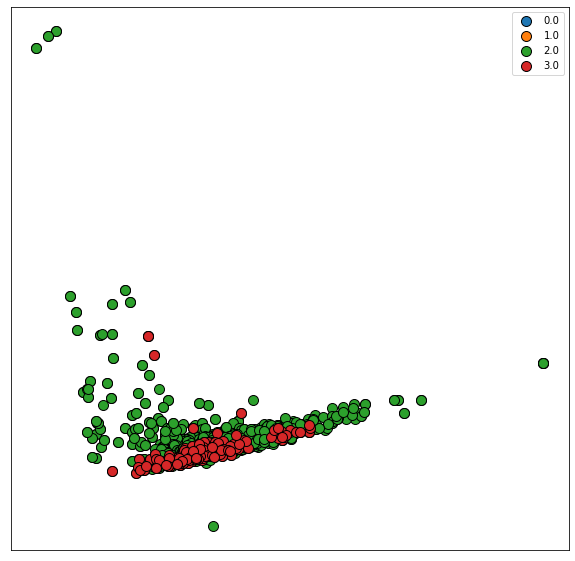

In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
def plot_pca_data(X, y):    
    
    LE = LabelEncoder()
    y_encoded = LE.fit_transform(y)
    
    pca = PCA(n_components=2)
    pca.fit(X)
    pca_X = pca.transform(X)

    x_axis = pca_X[:,0]
    y_axis = pca_X[:,1]

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    for label in np.unique(y):
        ax.scatter(pca_X[y==label, 0],
                   pca_X[y==label, 1], 
                   label=label,
                   s=100,
                   edgecolor='k')
        

    ax.legend()
    plt.xticks([])
    plt.yticks([])

plot_pca_data(X, y)

training and testing the data model.

In [120]:
X = thyroid_data.drop('Category', axis=1)
y = thyroid_data['Category']

col_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [121]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
svm_clf = SVC(class_weight='balanced')
def cross_validate(estimator, X_data, y_data, scoring='accuracy', cv=3, Z=2):
    
    classes = y_data.unique()
    
    # Execute Cross Validation
    scores = cross_val_score(estimator=estimator, X=X_data, y=y_data, cv=cv, scoring=scoring)

    print("Model Scoring Evaluation Results")
    print("The mean score and the confidence interval of the score estimate are:")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * Z))

cross_validate(estimator=svm_clf, X_data=X_train, y_data=y_train, cv=5)

Model Scoring Evaluation Results
The mean score and the confidence interval of the score estimate are:
Accuracy: 0.55 (+/- 0.02)


In [122]:
svm_clf.fit(X_train, y_train)
y_true, y_pred = y_test, svm_clf.predict(X_test)
def classireport():
     
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("*"*50)
    print()
    print("\t\t\tClassification Report")
    print()
    print(classification_report(y_true, y_pred))
classireport()

Accuracy: 0.5781637717121588
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.22      0.79      0.34        19
         1.0       0.20      0.60      0.29        55
         2.0       0.95      0.55      0.70       689
         3.0       0.22      0.86      0.35        43

    accuracy                           0.58       806
   macro avg       0.40      0.70      0.42       806
weighted avg       0.85      0.58      0.65       806



Now, selecting only top 10 features and training model

In [123]:
X = thyroid_data[['T3 Measured','T4U Measured' ,'Tumor','TSH Measured' ,'TT4 Measured','Age','FTI Measured','FTI' ,'Pregnant',
'T4U']]
y = thyroid_data['Category']

col_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [124]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
svm_clf = SVC(class_weight='balanced')
def cross_validate(estimator, X_data, y_data, scoring='accuracy', cv=3, Z=2):
    
    classes = y_data.unique()
    
    # Execute Cross Validation
    scores = cross_val_score(estimator=estimator, X=X_data, y=y_data, cv=cv, scoring=scoring)

    print("Model Scoring Evaluation Results")
    print("The mean score and the confidence interval of the score estimate are:")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * Z))

cross_validate(estimator=svm_clf, X_data=X_train, y_data=y_train, cv=5)

Model Scoring Evaluation Results
The mean score and the confidence interval of the score estimate are:
Accuracy: 0.61 (+/- 0.05)


In [125]:
svm_clf.fit(X_train, y_train)
y_true, y_pred = y_test, svm_clf.predict(X_test)
classireport()

Accuracy: 0.5880893300248139
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.18      0.79      0.30        19
         1.0       0.17      0.49      0.26        55
         2.0       0.95      0.58      0.72       689
         3.0       0.23      0.79      0.36        43

    accuracy                           0.59       806
   macro avg       0.38      0.66      0.41       806
weighted avg       0.84      0.59      0.66       806



using random forest classifier model

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [271]:
model = RandomForestClassifier(n_estimators = 100, random_state = None) # random_state used for shuffling generally 0,42,None depending on no .of permuttations of suffling
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classireport()

Accuracy: 0.7406947890818859
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.04      0.05      0.05        19
         1.0       0.08      0.09      0.09        55
         2.0       0.85      0.86      0.85       689
         3.0       0.00      0.00      0.00        43

    accuracy                           0.74       806
   macro avg       0.24      0.25      0.25       806
weighted avg       0.73      0.74      0.74       806



In [272]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[0.76811594 0.77018634 0.75362319 0.7494824  0.77018634]
0.7623188405797101


using naive bayes classifier model

In [273]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [274]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
classireport()

Gaussian Naive Bayes model accuracy(in %): 74.56575682382135
Accuracy: 0.7456575682382134
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.30      0.95      0.45        19
         1.0       0.34      0.24      0.28        55
         2.0       0.93      0.77      0.85       689
         3.0       0.27      0.86      0.41        43

    accuracy                           0.75       806
   macro avg       0.46      0.70      0.50       806
weighted avg       0.84      0.75      0.77       806



In [275]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[0.76811594 0.77018634 0.75362319 0.7494824  0.77018634]
0.7623188405797101


using decision tree classifier model

In [267]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) # criterion can be gini(default) or entropy
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
classireport()

Accuracy: 0.7344913151364765
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.10      0.16      0.12        19
         1.0       0.16      0.24      0.19        55
         2.0       0.87      0.83      0.85       689
         3.0       0.03      0.02      0.03        43

    accuracy                           0.73       806
   macro avg       0.29      0.31      0.30       806
weighted avg       0.76      0.73      0.74       806



In [268]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[0.76811594 0.77018634 0.75362319 0.7494824  0.77018634]
0.7623188405797101


using k nearest neighbour classifier model

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2) #metric is default parameter which describes distance between points
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
classireport()

Accuracy: 0.8076923076923077
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.10      0.05      0.07        19
         1.0       0.09      0.04      0.05        55
         2.0       0.86      0.93      0.89       689
         3.0       0.18      0.09      0.12        43

    accuracy                           0.81       806
   macro avg       0.31      0.28      0.28       806
weighted avg       0.75      0.81      0.78       806



In [277]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[0.76811594 0.77018634 0.75362319 0.7494824  0.77018634]
0.7623188405797101


using logistic regression model

In [127]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  
classireport()

Accuracy: 0.8523573200992556
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.50      0.11      0.17        19
         1.0       0.50      0.04      0.07        55
         2.0       0.86      0.99      0.92       689
         3.0       0.00      0.00      0.00        43

    accuracy                           0.85       806
   macro avg       0.46      0.28      0.29       806
weighted avg       0.78      0.85      0.80       806



In [128]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[0.85093168 0.85714286 0.85714286 0.85093168 0.84886128]
0.8530020703933747


using kernel svm model

In [129]:
from sklearn.svm import SVC # import SVC model
classifier = SVC(kernel = 'rbf', random_state = 0) # rbf=radiel basis function used for svm kernel
classifier.fit(X_train, y_train) 
y_predict = classifier.predict(X_test)
classireport()

Accuracy: 0.8523573200992556
**************************************************

			Classification Report

              precision    recall  f1-score   support

         0.0       0.50      0.11      0.17        19
         1.0       0.50      0.04      0.07        55
         2.0       0.86      0.99      0.92       689
         3.0       0.00      0.00      0.00        43

    accuracy                           0.85       806
   macro avg       0.46      0.28      0.29       806
weighted avg       0.78      0.85      0.80       806



In [130]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5) #estimator parameters are model and classifier
print(all_accuracies)
print(all_accuracies.mean())

[0.85507246 0.85507246 0.85300207 0.85507246 0.85300207]
0.8542443064182195


using logistic regression model saves as pickle file

In [131]:
import pickle

In [132]:
# save the model to disk
filename = 'Our_Trained_logistic_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [133]:
pickling_on = open("scaler.pickle","wb")
pickle.dump(scaler, pickling_on)
pickling_on.close()